# Depth Space --> Density Space

In [28]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
from importlib import reload

In [27]:
import filt_funcs as ff
import EV_funcs as ef
import plot_funcs as pf
import density_funcs as df

In [45]:
reload(ff)
reload(ef)
reload(pf)
reload(df)

<module 'density_funcs' from '/home.ufs/amf2288/argo-intern/density_funcs.py'>

In [15]:
s_ds=xr.open_dataset("202206/202206_lon:(25,45)_lat:(-60,-50).nc")
s = ff.get_ds_interp(s_ds,0,2000,4)
s['SPICE'] = gsw.spiciness0(s.SA,s.CT).rename('SPICE')

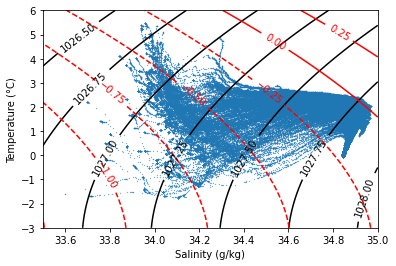

In [24]:
#something is wrong with density here, values look okay except that it should be 26.5-28, not 1026.5-1028
#now that I'm looking, this problem is also present in the function_test notebook, so need to troubleshoot there
#wait it's also in the CCS_poster notebook???? okay I really need to figure this out

ds_li=[s]
Taxis=[-3,6,50]
Saxis=[33.5,35,50]

pf.plot_TS(ds_li, Taxis, Saxis)

In [38]:
rho_grid = np.linspace(26.5,28,1001)

In [39]:
s_rho = df.interpolate2density(s, rho_grid)

50
100
150
200
250
300


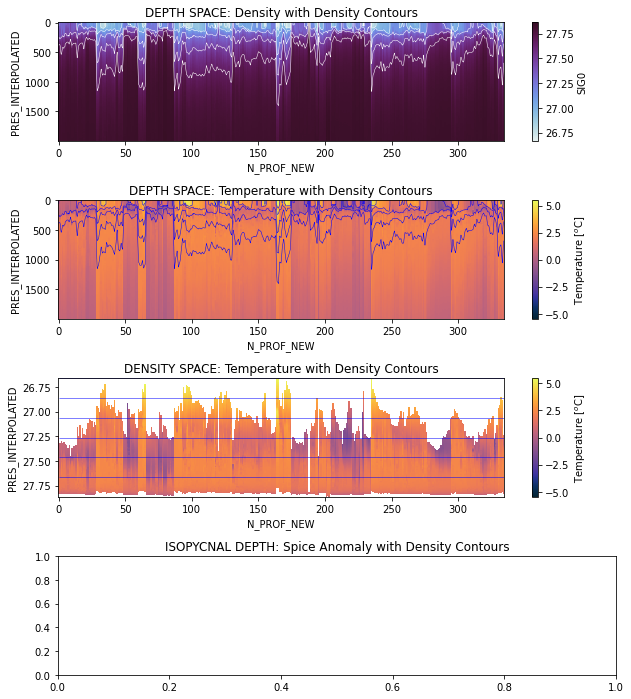

In [46]:
pf.plot_depth_profs(s, s_rho)